### Week2--workshop--image enhancement and denoise 

#### import libraries 

In [64]:
"""
Section 1: Image enhancement

Describution

1.1 -->Enhance image by power-law tnrasformation.

formula: s = c*(r**gamma)
r: image gray levels 
s: transformed image gray levels
c and gamma: positive constants 
gamma < 1: used to expand the values of dark pixels in an image while compressing the higher-level values.
gamma > 1: used to expand the values of bright pixels in an image while compressing the lower-level values.

"""

'\nSection 1: Image enhancement\n\nDescribution\n\n1.1 -->Enhance image by power-law tnrasformation.\n\nformula: s = c*(r**gamma)\nr: image gray levels \ns: transformed image gray levels\nc and gamma: positive constants \ngamma < 1: used to expand the values of dark pixels in an image while compressing the higher-level values.\ngamma > 1: used to expand the values of bright pixels in an image while compressing the lower-level values.\n\n'

#### read image

In [65]:
# import libraries

import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt

####  implement power law transform 

In [66]:
# define a function to show the img

def img_show(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # we use open cv to read the image
    plt.figure(figsize=(10,7))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.show()

In [67]:
img_path1 = 'C:\\Users\\jugao\\OneDrive - University of Lincoln\\Teaching\\Applied data science\\week2\\workshop\\week2_test1.jpg'  # to apply gamma <1
img_path2 = 'C:\\Users\\jugao\\OneDrive - University of Lincoln\\Teaching\\Applied data science\\week2\\workshop\\week2_test2.jpg' # to apply gamma >1

img1 = cv.imread(img_path1)
img2 = cv.imread(img_path2)

In [68]:
# implement power law transform 
# img: BGR image 
# c:  positive constant value
# gamma:
#        if gamma <1: result will be brighter
#        if gamma >1: result will be darker

def power_law_transform(img, c, gamma):
    # convert BGR img to gray level
    gray =  cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    print('*** Original Image ***')
    img_show(gray)
    # apply power-law function
    gray = c*(gray**gamma)
    # convert gray level range to [0,255]
    gray = (255/(gray.max()-gray.min())*(gray - gray.min())).astype(np.uint8)
    # convert gray level img to BGR
    img = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)
    
    print('*** Transformed Image ***')
    if gamma <1:
        print('brighter')
    else:
        print('darker')
    img_show(img)

*** Original Image ***


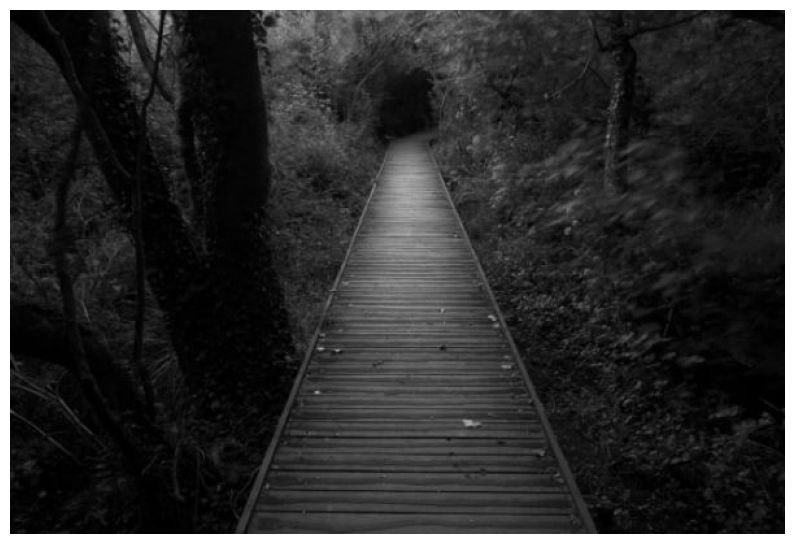

*** Transformed Image ***
brighter


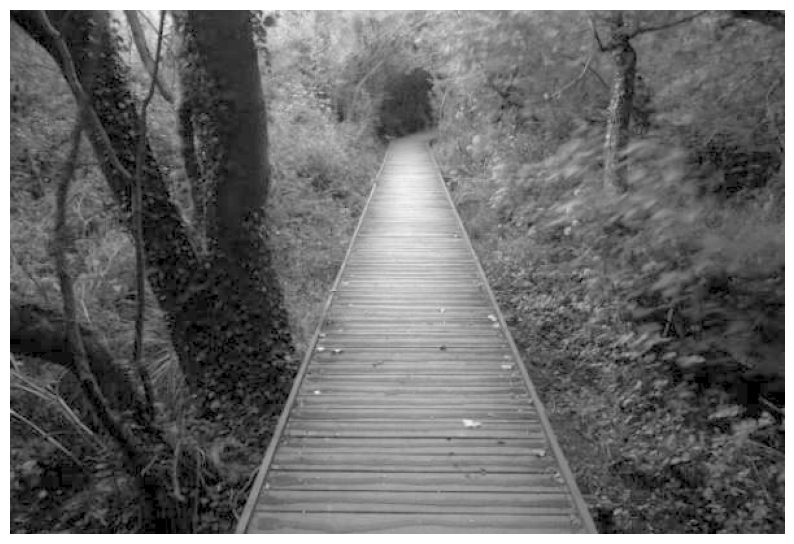

*** Original Image ***


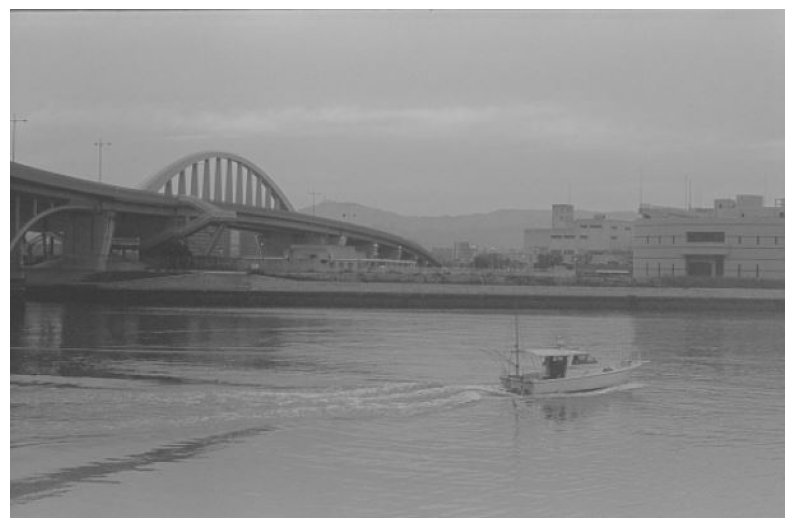

*** Transformed Image ***
darker


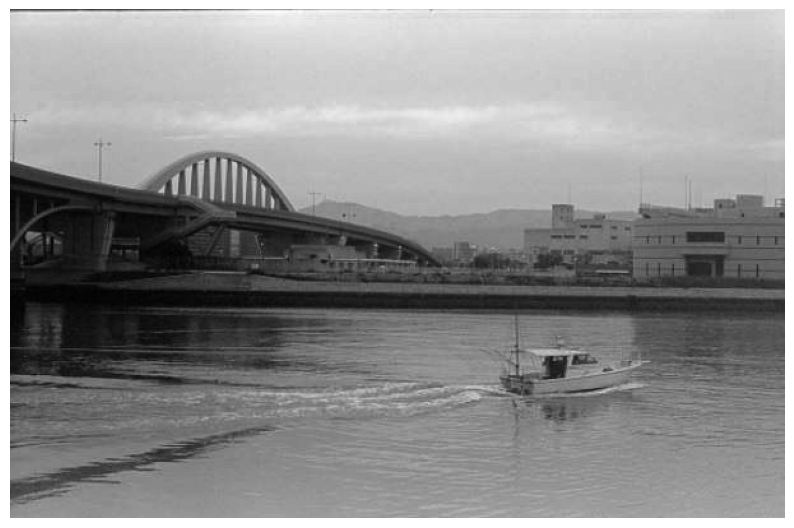

In [69]:
#result

power_law_transform(img1,1,0.5)
power_law_transform(img2,1,1.5)

In [70]:
"""
Description

1.2-->  Negative gray levels of an image
Suitable for enhancing white or gray detail embedded in dark regions of an image

"""

'\nDescription\n\n1.2-->  Negative gray levels of an image\nSuitable for enhancing white or gray detail embedded in dark regions of an image\n\n'

In [71]:
# implement function to negative the input image
# img: GBR image

def negative_img(img):
    img_show(img)
    # convert BGR img to gray level
    gray =  cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    # negative img
    gray = 255 - gray
    # convert gray level img to BGR
    img = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)
    
    img_show(img)

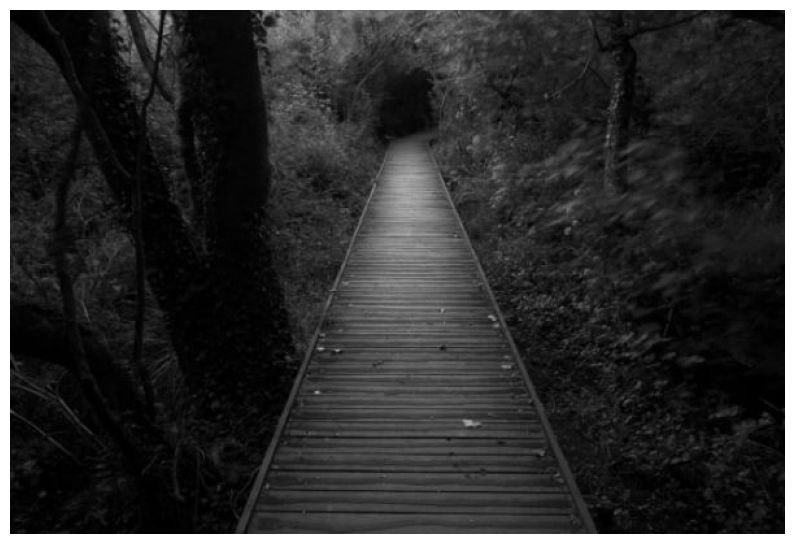

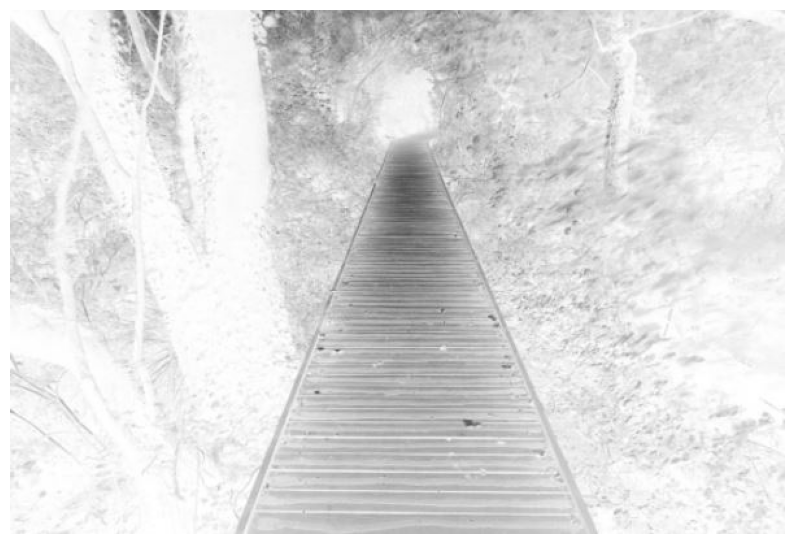

In [72]:
negative_img(img1)

In [73]:
"""
Describtion: 

1.3--> Enhance image by log transformation.

formula: s = c*log(1+r)
r: image gray levels
s: transformed image gray levels
c: constant

Used to expand the values of dark pixels in an image while compressing the higher-level values.
"""

'\nDescribtion: \n\n1.3--> Enhance image by log transformation.\n\nformula: s = c*log(1+r)\nr: image gray levels\ns: transformed image gray levels\nc: constant\n\nUsed to expand the values of dark pixels in an image while compressing the higher-level values.\n'

In [74]:
# Implement function to transform input image by log function
# img: BGR image
# constant value in transformation formula: s = c*log(1+r)

def log_transform(img, c):
    print('*** Original Image ***')
    img_show(img)
    # convert BGR img to gray level
    gray =  cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    # apply log unction
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            gray[i,j] = c*math.log(gray[i,j] + 1)
    
    # convert gray level range to [0,255]
    gray = (255/(gray.max()-gray.min())*(gray - gray.min())).astype(np.uint8)
    # convert gray level img to BGR
    img = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)
    
    print('*** Transformed Image ***')
    img_show(img)

*** Original Image ***


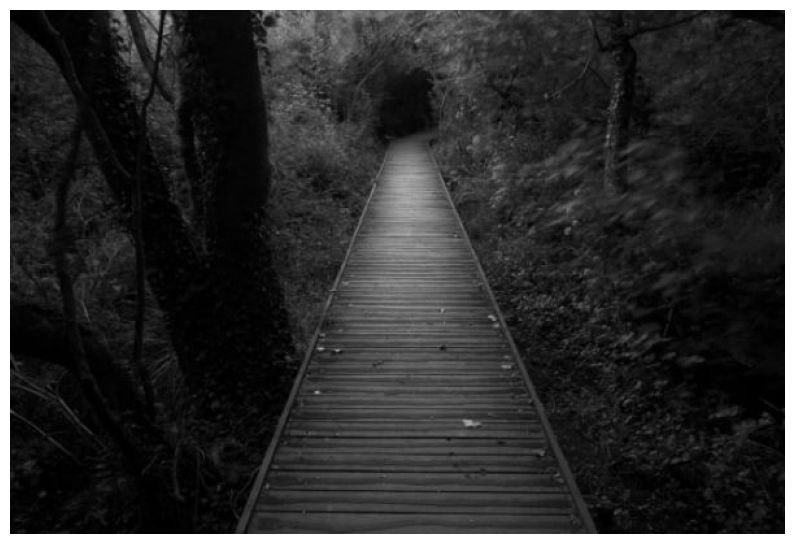

*** Transformed Image ***


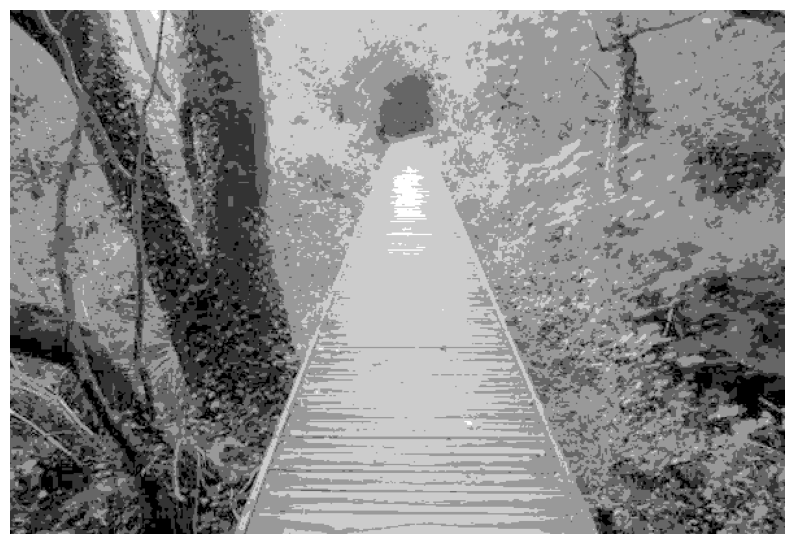

In [75]:
log_transform(img1, 1)

In [76]:
"""

Section 2: Image de-noising 

 2.1--> add Gaussian noise on the image of week2_test2.jpg
  using fig.add_subplot() to arrange the image display
"""

'\n\nSection 2: Image de-noising \n\n 2.1--> add Gaussian noise on the image of week2_test2.jpg\n  using fig.add_subplot() to arrange the image display\n'

In [77]:

### read week-test2.jpg in grayscale to add noise in one channel
img2_gray=cv.imread("C:\\Users\\jugao\\OneDrive - University of Lincoln\\Teaching\\Applied data science\\week2\\workshop\\week2_test2.jpg",0)

gauss_noise=np.zeros(img2_gray.shape,dtype=np.uint8)
cv.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
# add gaussian noise on img1  
gn_img=cv.add(img2_gray,gauss_noise)

Text(0.5, 1.0, 'Combined')

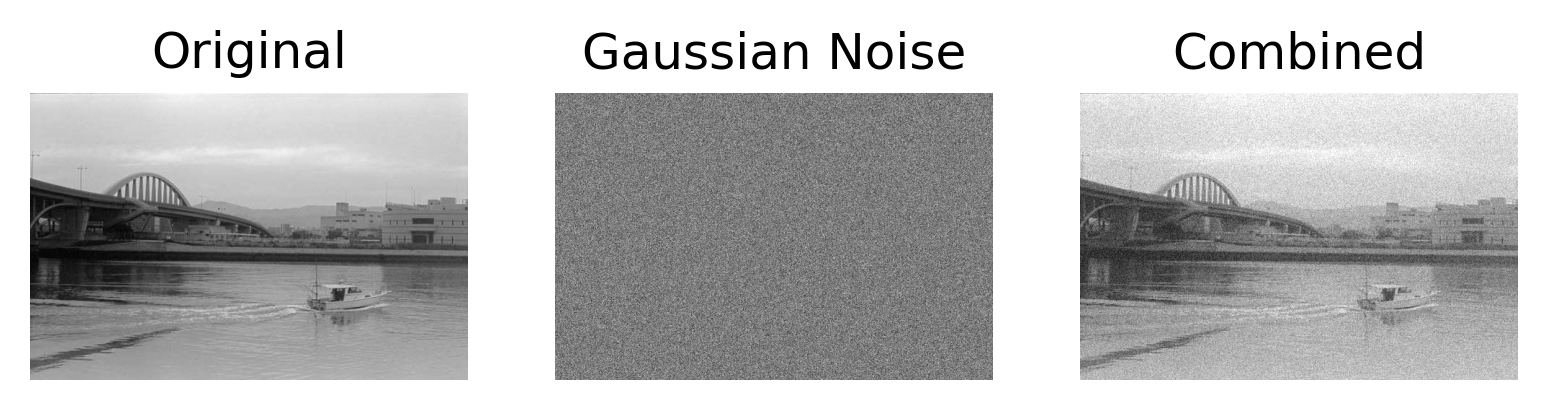

In [78]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img2_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [79]:
"""
Section 2: Image de-noising 

 2.2--> add uniform noise
 
 Contrary to Gaussian noise, Uniform noise is a signal dependent (unless dithering is caused or applied) 
 that follows a uniform distribution. It is caused by the quantization of the pixels of an image to a number
 of discrete levels. It is generally created when analog data is converted to digital form, and is not often
 encountered in real-world imaging systems.

"""

'\nSection 2: Image de-noising \n\n 2.2--> add uniform noise\n \n Contrary to Gaussian noise, Uniform noise is a signal dependent (unless dithering is caused or applied) \n that follows a uniform distribution. It is caused by the quantization of the pixels of an image to a number\n of discrete levels. It is generally created when analog data is converted to digital form, and is not often\n encountered in real-world imaging systems.\n\n'

In [80]:
uni_noise=np.zeros(img2_gray.shape,dtype=np.uint8)
cv.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)

In [81]:
un_img=cv.add(img2_gray,uni_noise)

Text(0.5, 1.0, 'Combined')

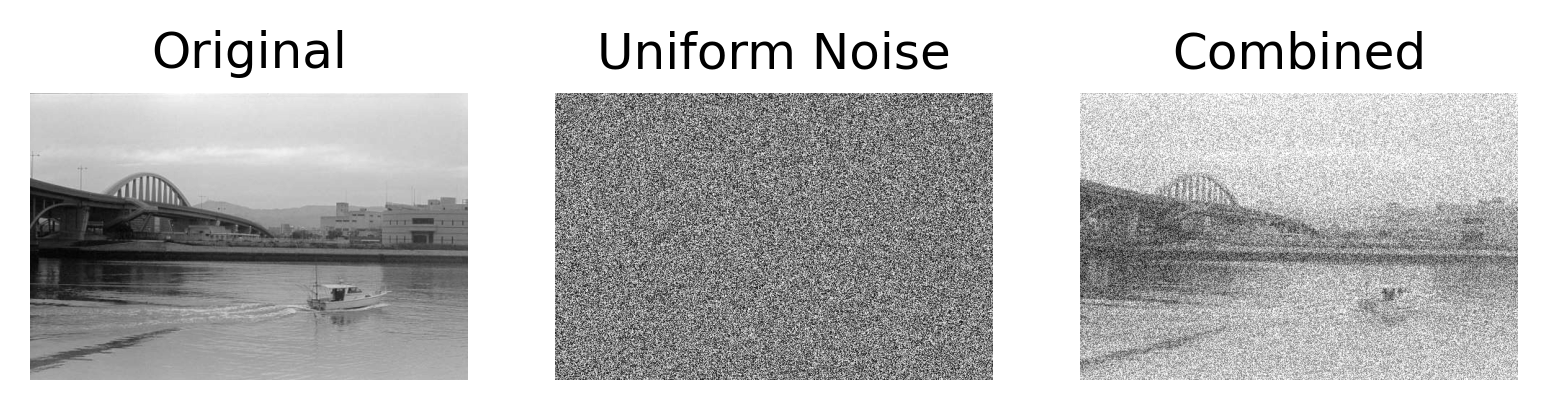

In [82]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img2_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(uni_noise,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [83]:
"""
Section 2: Image de-noising 

 2.3--> add impulse noise
 
Impulse or "Salt and Pepper" noise is the sparse occurance of maximum (255) and minimum (0) pixel values in an image. 
This can be noticed as the presence of black pixels in bright regions and white pixels in dark regions. 
This type of noise is caused due to sharp and sudden disturbances in the image signal, and is mainly generated by errors
in analog to digital conversion or bit transmission.

"""

'\nSection 2: Image de-noising \n\n 2.3--> add impulse noise\n \nImpulse or "Salt and Pepper" noise is the sparse occurance of maximum (255) and minimum (0) pixel values in an image. \nThis can be noticed as the presence of black pixels in bright regions and white pixels in dark regions. \nThis type of noise is caused due to sharp and sudden disturbances in the image signal, and is mainly generated by errors\nin analog to digital conversion or bit transmission.\n\n'

In [84]:
imp_noise=np.zeros(img2_gray.shape,dtype=np.uint8)
cv.randu(imp_noise,0,255)
imp_noise=cv.threshold(imp_noise,245,255,cv.THRESH_BINARY)[1]

In [85]:
in_img=cv.add(img2_gray,imp_noise)

Text(0.5, 1.0, 'Combined')

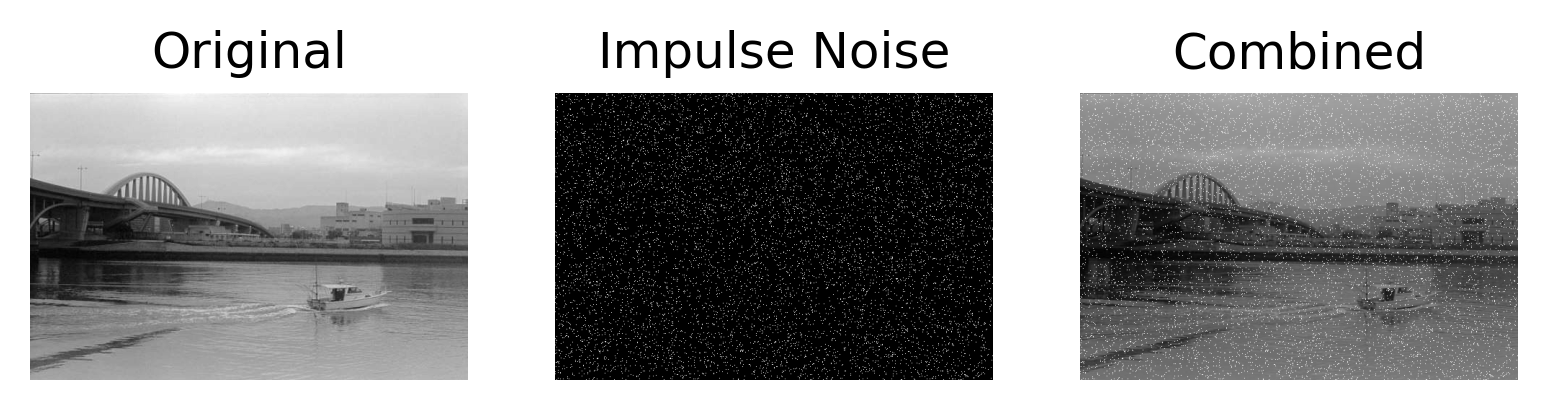

In [86]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img2_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [87]:
"""
Section 2: Image de-noising 

 2.4--> removing noise
 
This function uses Non-local Means Denoising algorithm, and expects greyscale image with Gaussian white noise.
Using inbuilt function fastNlMeansDenoising

"""

'\nSection 2: Image de-noising \n\n 2.4--> removing noise\n \nThis function uses Non-local Means Denoising algorithm, and expects greyscale image with Gaussian white noise.\nUsing inbuilt function fastNlMeansDenoising\n\n'

Text(0.5, 1.0, 'After Denoising')

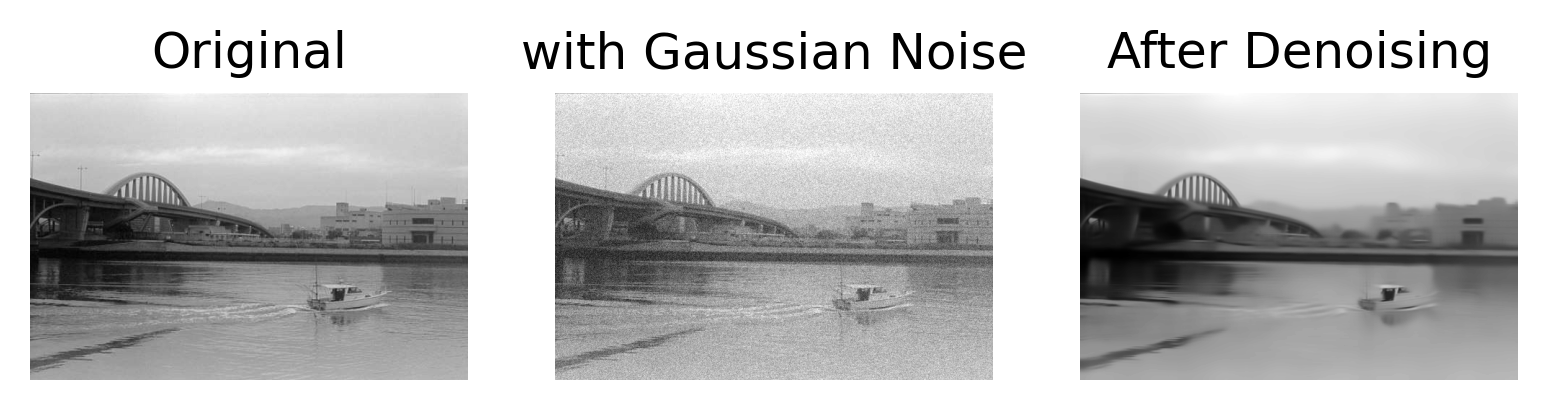

In [88]:
denoised1=cv.fastNlMeansDenoising(img2_gray,None,10,10)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img2_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised1,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

In [89]:
"""
Section 2: Image de-noising 

 2.4--> removing noise
 
This function uses mdeian Denoising algorithm, and expects greyscale image with impulse noise.
Using inbuilt function cv2.medianBlur

"""

'\nSection 2: Image de-noising \n\n 2.4--> removing noise\n \nThis function uses mdeian Denoising algorithm, and expects greyscale image with impulse noise.\nUsing inbuilt function cv2.medianBlur\n\n'

Text(0.5, 1.0, 'Median Filter')

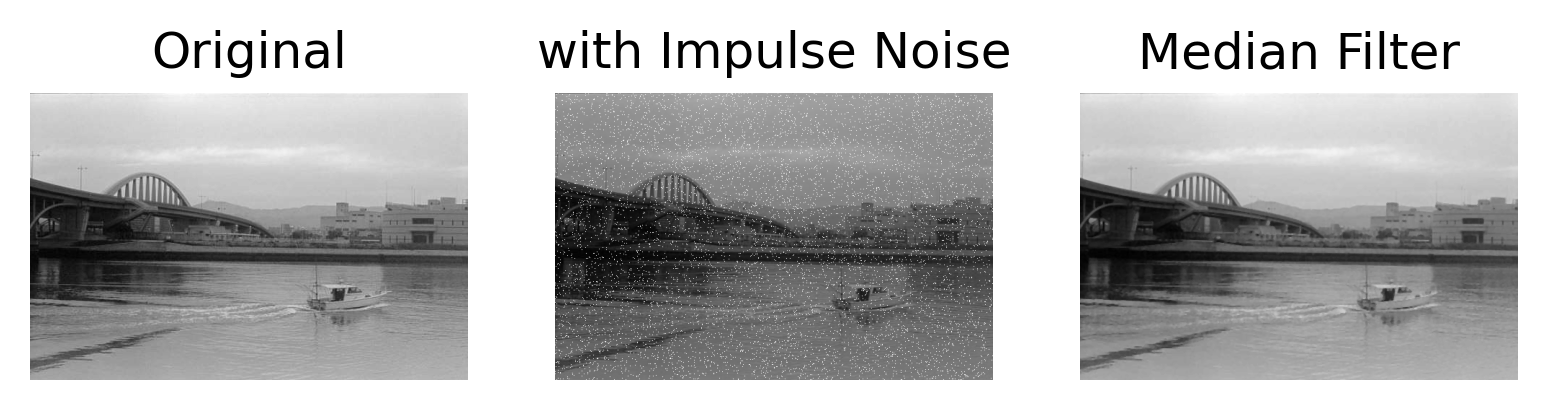

In [90]:
blurred=cv.medianBlur(img2_gray,3)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img2_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

In [91]:
### references:
"""
https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook
"""


'\nhttps://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook\n'